In [31]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns


#ENCODE VARIABLES 

#(dummy) coding for categorical variables one hot coding 

#get_dummies 
#X = petdat.select_dtypes(include=[object])
#X.head(3)

#coding ordinal variables age? 

#center and scale continuous variables 


#read in pickled data 



SyntaxError: invalid syntax (<ipython-input-31-4eba9f224559>, line 15)

In [4]:
#setup linear regression tools 
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 


# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

In [10]:
from sklearn.datasets import load_boston

boston = load_boston()
boston.keys()
boston.data.shape
print(boston.feature_names)




['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos.head()
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Text(0.5, 1.0, 'Relationship between rooms and price')

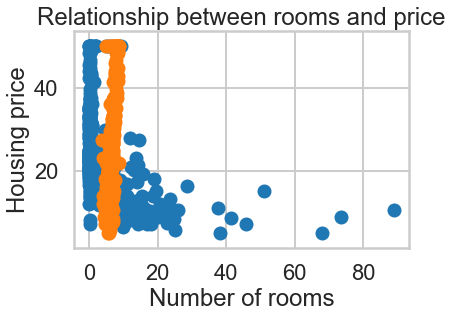

In [16]:
plt.scatter(bos.CRIM,bos.PRICE)
plt.xlabel("Per capita crime rate")
plt.ylabel("Housing price")
plt.title("Relationship between crime rate and Price")



Text(0.5, 1.0, 'Relationship between rooms and price')

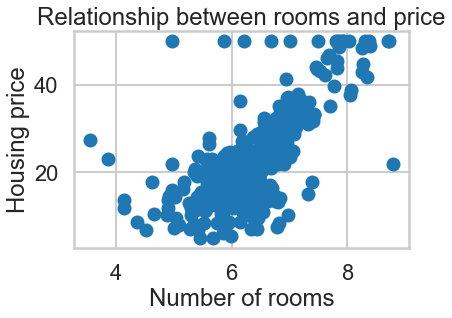

In [17]:
plt.scatter(bos.RM,bos.PRICE)
plt.xlabel("Number of rooms")
plt.ylabel("Housing price")
plt.title("Relationship between rooms and price")

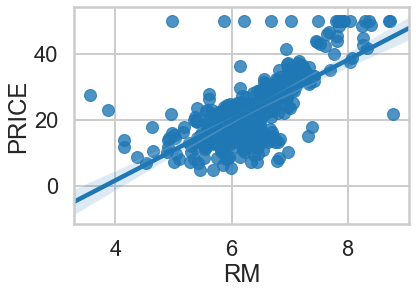

In [18]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

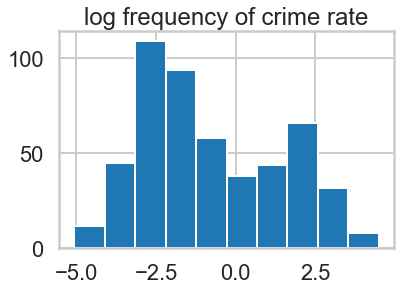

In [20]:
plt.hist(np.log(bos.CRIM))
plt.title('log frequency of crime rate')
plt.show()

In [21]:
#preprocess the data 

#calculate the DV

#drop variables we don't want 

#center and scale numeric variables

#deal with ordinal variables.

#deal with categorical variables 

#deal with NAs in categorical variables 
    #Ignore observations of missing values if we are dealing with large data sets and less number of records has missing values
    #Ignore variable, if it is not significant
    #Develop model to predict missing values
    #Treat missing data as just another category

#change labels to integers 
#create function to apply LabelEncoder to many columns 

#note: do this to THE ENTIRE dataset, before train-test split, so that 
#all levels of categorical variables are taken into account. 

#onehot encoding of categorical variables. 

#this is a packaage called category_encoders taht both transforms the labels
#and does one hot coding

import category_encoders as ce
ohe = ce.OneHotEncoder(handle_unknown='ignore', use_cat_names=True)
X_train_ohe = ohe.fit_transform(X_train)
X_train_ohe.head()

#OR
cols_to_transform = [ 'a', 'list', 'of', 'categorical', 'column', 'names' ]
df_with_dummies = pd.get_dummies( columns = cols_to_transform )



sklearn.preprocessing.OneHotEncoder()

pd.get_dummies()


IndentationError: unexpected indent (<ipython-input-21-ba9fa1678ede>, line 15)

In [ ]:
#create train-test-split
#https://medium.com/hugo-ferreiras-blog/dealing-with-categorical-features-in-machine-learning-1bb70f07262d

from sklearn.model_selection import train_test_split
X = df.drop(columns='Class')
y = df['Class'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [ ]:
#create model on training data 

from sklearn.linear_model import LinearRegression
#drop the dependent variable from the 
X = bos.drop('PRICE', axis = 1)

# first create t
lm = LinearRegression()
lm

lm.fit(X, bos.PRICE)

In [ ]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]